# Outline
    
### Exploratory Data Analysis
    
### Machine Learning


In [3]:
!jt -l


/bin/bash: jt: command not found


In [4]:
!jt -t monokai

/bin/bash: jt: command not found


---

In [127]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
from scipy.stats import percentileofscore
import os

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder, FunctionTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
df = data.copy()

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 12)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
data.describe(exclude=np.number).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.duplicated().any()

False

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis

<br>

<br>

### Survival Column (Target)

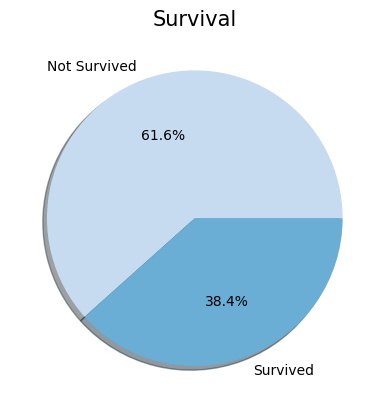

In [14]:
sns.set_palette('Blues',3)
plt.pie(data['Survived'].value_counts(),labels=['Not Survived','Survived'],shadow=True,autopct='%1.1f%%')
plt.title('Survival',fontsize=15)
plt.show()

More than <font color='steelblue'>60%</font> of Passengers <font color='#de1507'>Not Survived</font>

### Port of Embarkation, Passenger class and Sex 

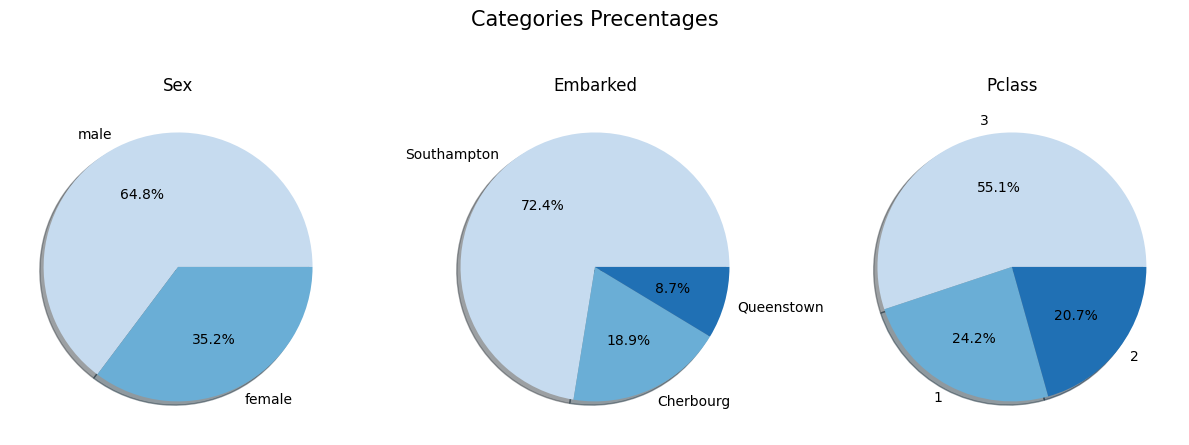

In [15]:
sns.set_palette('Blues',3)
labelss = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' :'Southampton'}
data['Embarked'] = data['Embarked'].replace(labelss)
cols = ['Sex','Embarked','Pclass']

def plot_pie(dataa,cols,title,fontsize=15,figsize=(12,5)):
    fig,ax = plt.subplots(1,len(cols),figsize=figsize)
    for i,col in enumerate(cols):
        ax[i].pie(dataa[col].value_counts(),labels=dataa[col].value_counts().index
        ,shadow=True,autopct='%1.1f%%')
        ax[i].set_title(col)

    fig.suptitle(title,fontsize=fontsize)
    fig.tight_layout()
    plt.show()
    
plot_pie(data,cols,'Categories Precentages')

1 - Men were the **majority** aboard the titanic

2 - Most Port of Embarkation was <font color='lightgreen'>Southampthon</font> (England)

3 - More than <font color ='steelblue'>50%</font> of Passengers were in <font color ='steelblue'>3rd Class</font>

### Cabin

In [16]:
data['Cabin'].isna().sum()

687

In [17]:
data['Cabins_letter'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'None')
data['Cabins_letter'].value_counts(dropna=False)

Cabins_letter
None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: count, dtype: int64

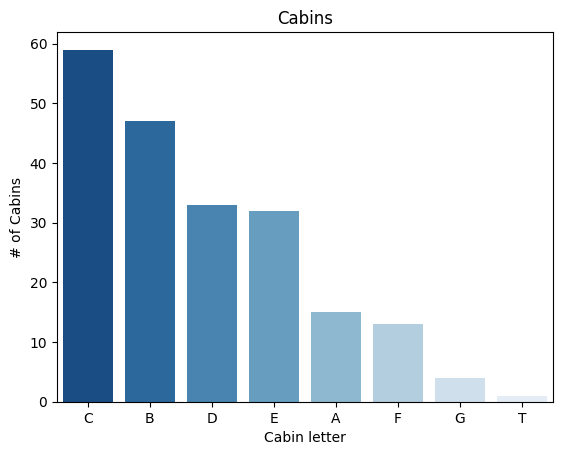

In [18]:

sns.barplot(x=data['Cabins_letter'].value_counts().index[1:],
            y=data['Cabins_letter'].value_counts().values[1:],palette='Blues_r')
plt.ylabel('# of Cabins');plt.xlabel('Cabin letter')
plt.title('Cabins')
plt.show()

we get the first letter of cabin name as maybe them in different floors on the ship, We will compare later if certain cabins have more chance to survive or not.

Unknown indicate the cabin number was missing data,

In [19]:
data.groupby('Cabins_letter')['Survived'].value_counts()

Cabins_letter  Survived
A              0             8
               1             7
B              1            35
               0            12
C              1            35
               0            24
D              1            25
               0             8
E              1            24
               0             8
F              1             8
               0             5
G              0             2
               1             2
None           0           481
               1           206
T              0             1
Name: count, dtype: int64

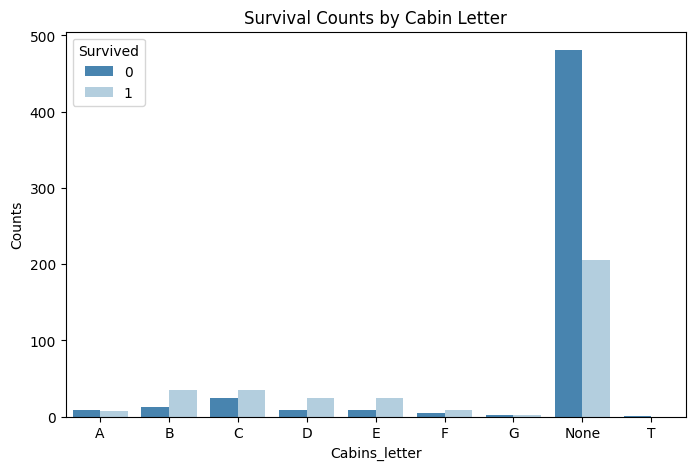

In [20]:
df_counts = data.groupby('Cabins_letter')['Survived'].value_counts().reset_index(name='Counts')
plt.figure(figsize=(8, 5))
sns.barplot(x='Cabins_letter', y='Counts', hue='Survived', data=df_counts,palette='Blues_r')
plt.title('Survival Counts by Cabin Letter')
plt.show()

In [21]:
ee = pd.get_dummies(data['Cabins_letter'],dtype=int)
for col in ee.columns:
    data[col] = ee[col]

In [22]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabins_letter,A,B,C,D,E,F,G,None,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,None,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,0,0,0


In [23]:
data.corr(numeric_only=True)['Pclass'].sort_values(ascending=False)

Pclass         1.000000
None           0.725541
SibSp          0.083081
G              0.055561
Parch          0.018443
F              0.011063
PassengerId   -0.035144
T             -0.052496
A             -0.204934
E             -0.230091
D             -0.278690
Survived      -0.338481
Age           -0.369226
B             -0.369572
C             -0.417048
Fare          -0.549500
Name: Pclass, dtype: float64

- <font color='lightgreen'>B,C</font> seems to close to 1st Class section in the ship
- Cibins without letter on it in data highly correlated with Passenger Class.

### Ticket

In [24]:
data['Ticket'].nunique()

681

In [25]:
data['Ticket'].sample(10)

648       S.O./P.P. 751
510              382651
771              350047
90               343276
667              312993
725              315094
23               113788
142    STON/O2. 3101279
535        F.C.C. 13529
276              347073
Name: Ticket, dtype: object

we will **drop** this column because we can't extract valiable information from it.

### Name

In [26]:
data['Name'].sample(10)

648                                   Willey, Mr. Edward
552                                 O'Brien, Mr. Timothy
704                              Hansen, Mr. Henrik Juul
353                            Arnold-Franchi, Mr. Josef
383    Holverson, Mrs. Alexander Oskar (Mary Aline To...
707                    Calderhead, Mr. Edward Pennington
227                      Lovell, Mr. John Hall ("Henry")
620                                  Yasbeck, Mr. Antoni
486      Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)
738                                   Ivanoff, Mr. Kanio
Name: Name, dtype: object

we will **drop** this column also.

---

### Numirical Columns

#### AGE

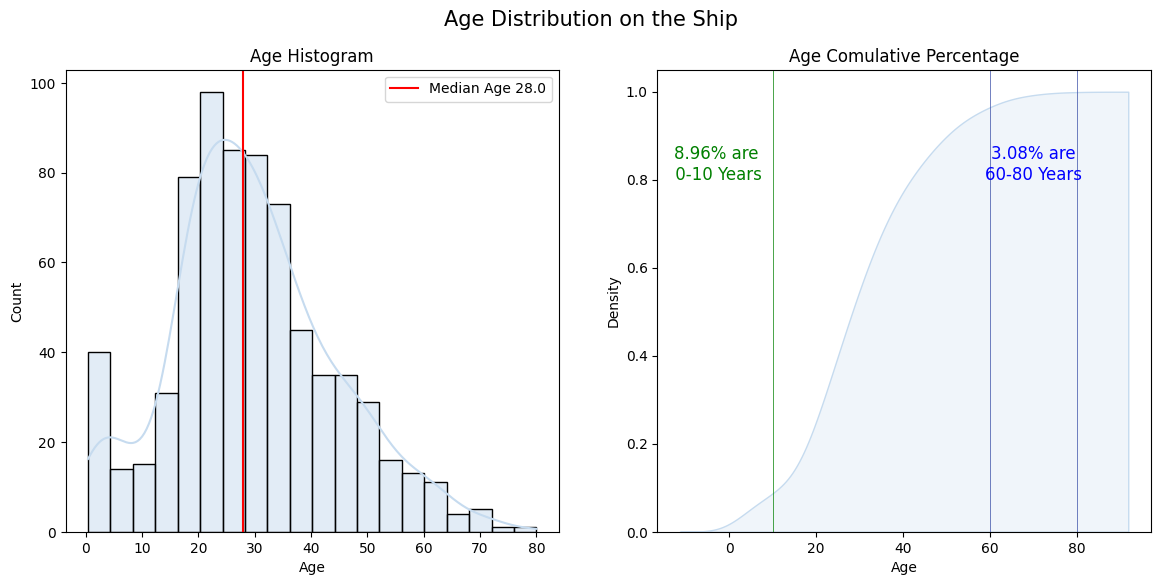

In [27]:
less10_years = percentileofscore(data['Age'],10,kind='weak',nan_policy='omit')
from80to60 = percentileofscore(data['Age'],80,kind='weak',nan_policy='omit')-\
            percentileofscore(data['Age'],60,kind='weak',nan_policy='omit')



fig,ax= plt.subplots(1,2,figsize=(14,6))
sns.set_palette('Paired')
sns.histplot(data=data,x='Age',kde=True,ax=ax[0])
sns.kdeplot(data=data,x='Age', cumulative=True,fill=True,ax=ax[1])

ax[0].axvline(data['Age'].median(),color='r',label=f"Median Age {data['Age'].median()}")
ax[1].axvline(10,color='g',label=f"{less10_years:.2f}% Less than 10 years",linewidth=.5)
ax[1].axvline(80,color='#384ca6',label=f"{from80to60:.2f}% from 60 to 80 Years",linewidth=.5)
ax[1].axvline(60,color='#384ca6',linewidth=.5)

ax[1].text(70, 0.8, f'{from80to60:.2f}% are\n60-80 Years', fontsize=12, ha='center', color='Blue')
ax[1].text(-3, 0.8, f'{less10_years:.2f}% are\n 0-10 Years', fontsize=12, ha='center', color='green')



ax[0].set_title('Age Histogram')
ax[1].set_title('Age Comulative Percentage')

fig.suptitle('Age Distribution on the Ship',fontsize=15)
ax[0].legend()
# ax[1].legend()

plt.show()

Age distribution almost getting close to normal distribution, We notice that there is many children less than 10 years aboard the ship (<font color='green'>9%</font> Less than 10 years),

Summing up the Old people and Young ( Assuming their is kind of Heaviness in movement in both ) resulting <font color='green'>13%</font>= more than 100 of Passengers.

We will discuss the ability of both classes of survival later..

### # of Parents/Children

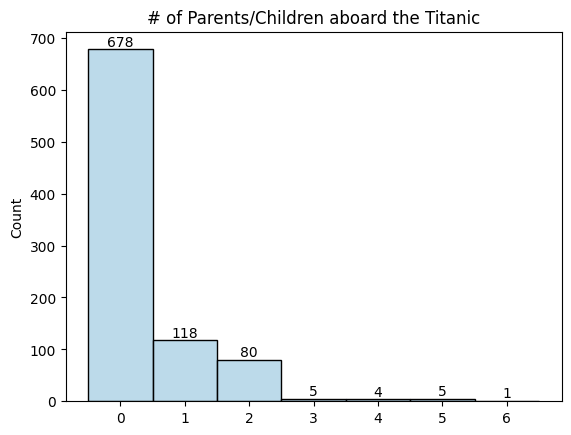

In [28]:
ax = sns.histplot(data['Parch'],discrete=True)
for i in ax.containers:ax.bar_label(i,)
plt.title('# of Parents/Children aboard the Titanic')
plt.xlabel('')
plt.show()

- Most passengers are without Parents or children on the ship, leaving more than 200 passenger.

- Are passengers with Parent or children has more chance or the opposite? we will discuss.

### # of siblings / spouses 

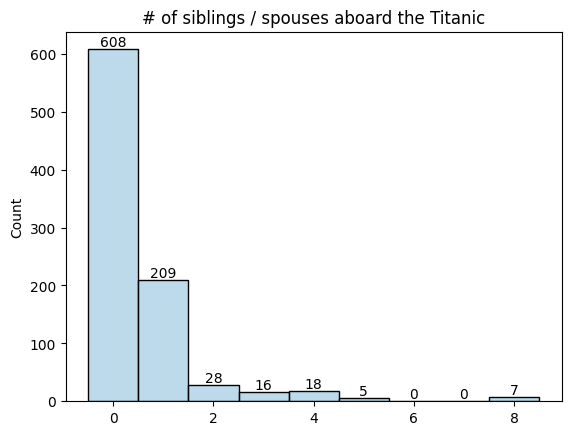

In [29]:
ax = sns.histplot(data=data,x='SibSp'
                  ,discrete=True
                 )
for i in ax.containers:ax.bar_label(i)
plt.title('# of siblings / spouses aboard the Titanic');plt.xlabel('')
plt.show()

- Most Passengers without siblings/spouses on the ship.

Question is : 

Are people with siblings/spouses has more chance to survive or not?

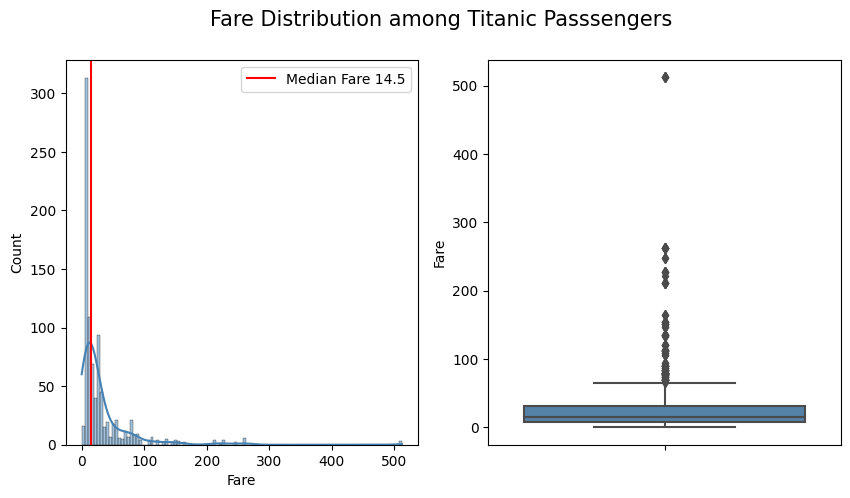

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=data,x='Fare',kde=True,color='steelblue',ax=ax[0])
ax[0].axvline(data['Fare'].median(),color='r',label=f"Median Fare {data['Fare'].median():.1f}")

sns.boxplot(data=data,y='Fare',ax=ax[1],color='steelblue')
ax[0].legend()
fig.suptitle('Fare Distribution among Titanic Passsengers',size=15)
plt.show()

- Box plot resulting many outlires in Fare column.

- Are People with alot of fare surivived?

In [31]:
df[df['Fare']>100]['Survived'].value_counts()

Survived
1    39
0    14
Name: count, dtype: int64

# Bivariate Anlysis

### Survival Among Differnet Categories

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabins_letter,A,B,C,D,E,F,G,None,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,None,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,None,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,C,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,None,0,0,0,0,0,0,0,1,0


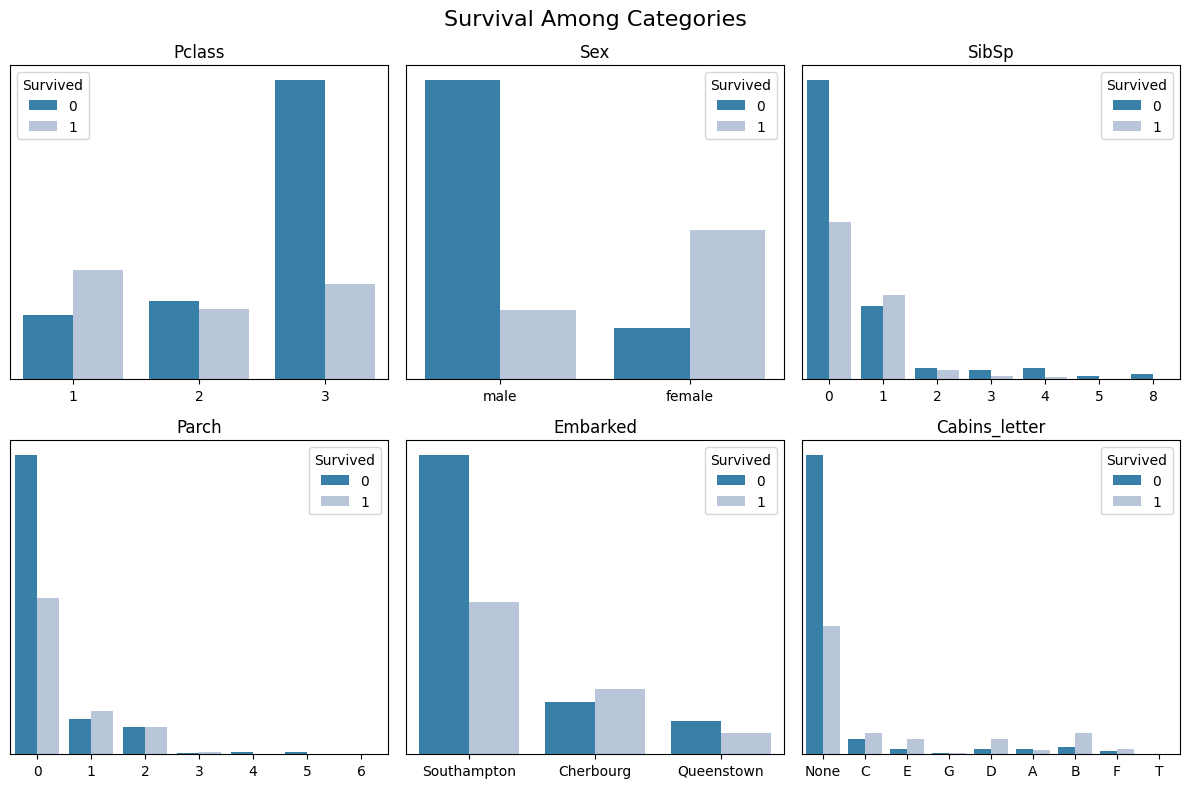

In [34]:
cat_cols = ['Pclass','Sex','SibSp','Parch','Embarked','Cabins_letter']
fig,ax = plt.subplots(2,3,figsize=(12,8))
for i,col in enumerate(cat_cols):
    r,c = i//3,i%3
    sns.countplot(data=data,x=col,hue='Survived',ax=ax[r,c],palette='PuBu_r')
    ax[r,c].set_title(col)
    ax[r,c].set_xlabel('');ax[r,c].set_ylabel('');ax[r,c].set_yticks([])

fig.suptitle('Survival Among Categories',fontsize=16)
fig.tight_layout()
plt.show()

1 - **Passenger Class**: Survival Percentage in 1st Class is higher than other classes.

2 - **Sex**: The majority of women survived.

3 - **Siblings/Spouses**: Siblings/spouses who were only 1 had the greatest chance of survival.

4 - **Parents/Children**: who were 1,2 had more chance of survival.

5 - **Embarkation Port**: Majority of Passengers who come from Charbourg(France) Survived.

#### Age distribution in data

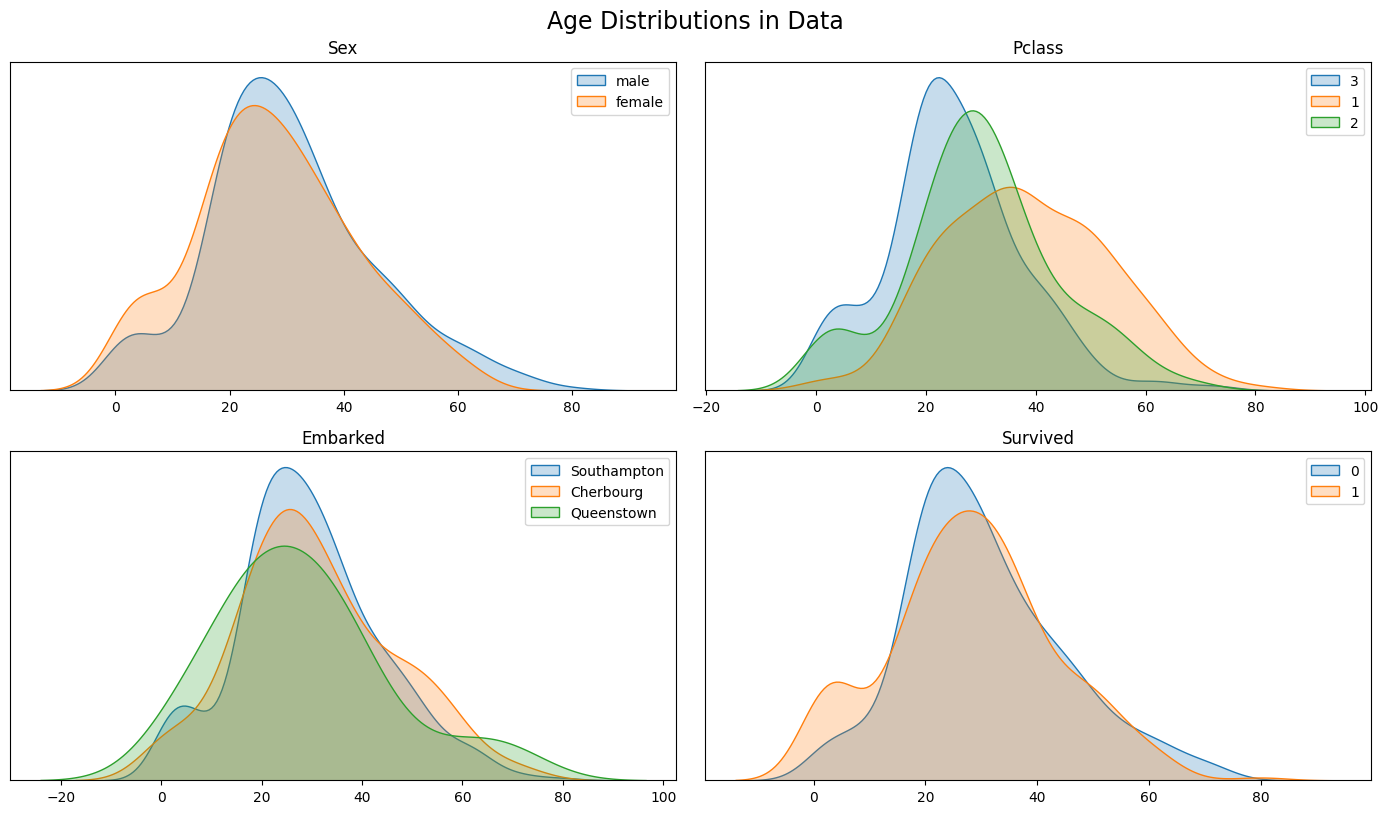

In [35]:
cat_cols=['Sex','Pclass','Embarked','Survived']
def automated_dist(num_col,additionalcolumns=0):
    fig = plt.figure(figsize=(14,12))
    
    cat_colmns = cat_cols.copy()
    if additionalcolumns:cat_colmns.append(additionalcolumns)

    for i,col in enumerate(cat_colmns):
        plt.subplot(3,2,i+1)
        toplot = data[col].unique().tolist()
        for ind,j in enumerate(toplot):
            g = sns.kdeplot(data = data[data[col]==j],x=num_col,label=j,fill=True)
        g.set_xlabel('');g.set_ylabel('');plt.yticks([])
        g.set_title(col);g.legend()

    fig.suptitle(f"{num_col} Distributions in Data",size=17)
    fig.tight_layout()
    plt.show()
    
sns.set_palette('tab10')
automated_dist('Age')

**Sex**: <font color='steelblue'>Equally</font> distributed.

**Passenger Class**: <font color='steelblue'>Class A</font> (1st class) Ages tend to be <font color='steelblue'>older</font> than others.

**Embarkation port**: <font color='steelblue'>Old Passengers (60-80)</font> are from <font color='steelblue'>Queenstown</font> Embarkation port.

**Survival**: Old Passengers (60-80) most of them <font color='#c22727'>not survived</font>.

#### Fare distribution in data

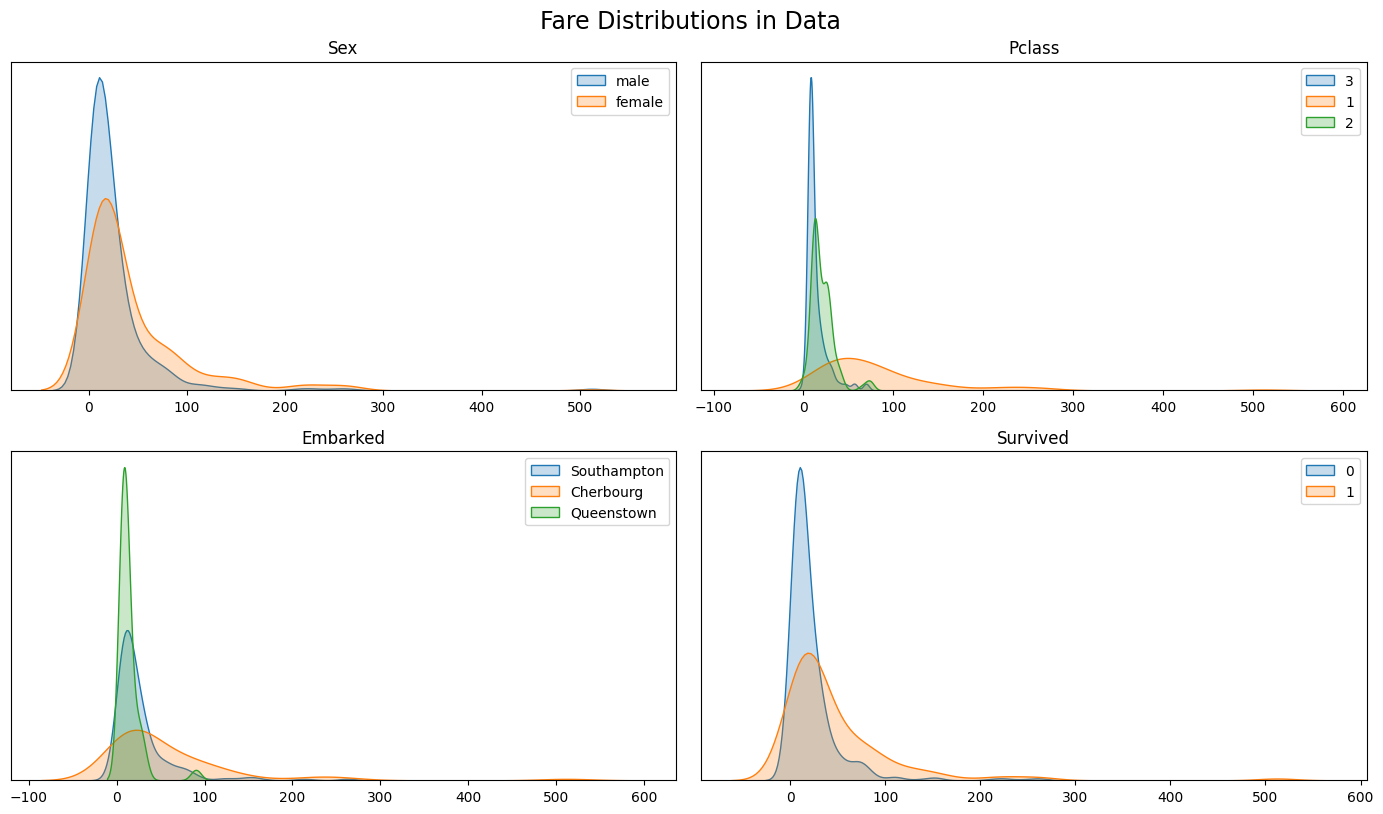

In [36]:
automated_dist('Fare')

- People with alot of Fare are <font color='steelblue'>Female</font>, <font color='steelblue'>Class A</font> Passenger Class, <font color='steelblue'>Charbourg</font> Embarkation port, And most of them <font color='#c22727'>Survived</font>

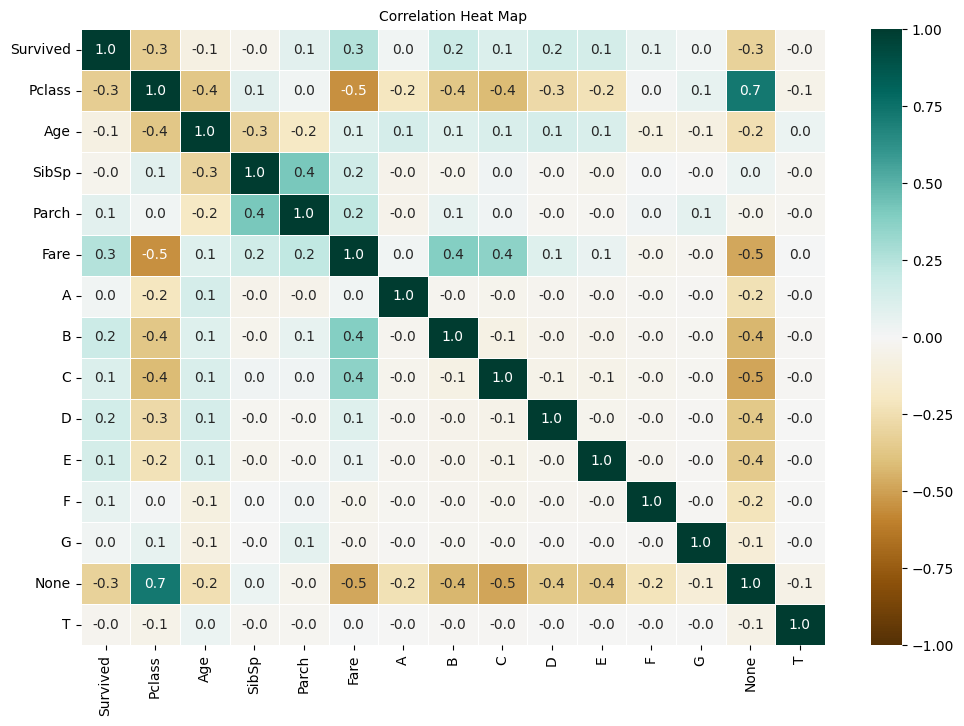

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(data.drop(columns=['PassengerId']).corr(numeric_only=True),
            cmap='BrBG',center=0,vmin=-1,vmax=1,annot=True,fmt='.1f',linewidth=.5)
plt.title('Correlation Heat Map',fontsize=10)
plt.show()

This heatmap confirmed the assumptions we extract earlier,
- Weak <font color='steelblue'>Positive</font> correlation between **Survival** and **Fare**.

- Weak <font color='#c22727'>Negative</font> correlation between **Passenger Class** and (**Fare**, **Age** and **Survived**).

- Weak <font color='steelblue'>Positive</font> correlation between **# of Parents/Children** and (**# of siblings/spouses** and **Fare**)


> All this assumptions we mentioned earlier.

----

# Data Preprocessing

## Plan to preprocess the data:
- Columns to **DROP**: PassengerId,Name,Ticket,Cabin.
- Columns to **Create**: Cabin_letter,Age_class,Alot_of_Fare
- Passenger Class (Pclass): leave it as it: (1,2,3) it is already encoded
- Sex: Label Encoder.
- Age: extract two classes from it( Children 0-10 y and Old 60-80) put into 3 categories in new column called('Age Class'->0,1,2 indicates 'child','normal','old') then use knn to impute missing vlaues then scaling with ( MinMax Scaler ).
- SibSp,Parch: leave as it.
- Fare: extract outlires data into new column('Alot Of Fare'->0,1) and trasfrom the original column Log Transfromation, then scaling.
- Cabin: transform this column to ( 0,1 -> there is letter in cabin or (no or null))
- Embarked: One hot encoding after impute the two missing with most frequent

In [38]:
from sklearn import set_config
set_config(transform_output='pandas',display='diagram')

In [39]:
data = df.copy()

Let's do sum invistagation for missing values in *AGE* column

In [40]:
missingages = data[pd.isnull(data['Age'])]

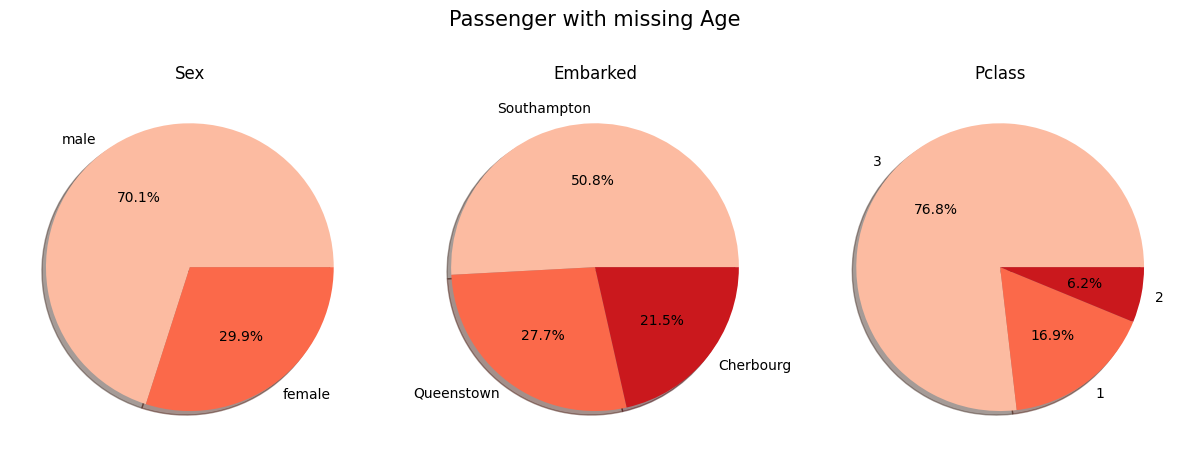

In [41]:
sns.set_palette('Reds',3)
missingages['Embarked'].replace(labelss,inplace=True);missingages['Sex'].replace({1:'Male',0:'Female'},inplace=True)
cols = ['Sex','Embarked','Pclass']

plot_pie(missingages,cols,'Passenger with missing Age')

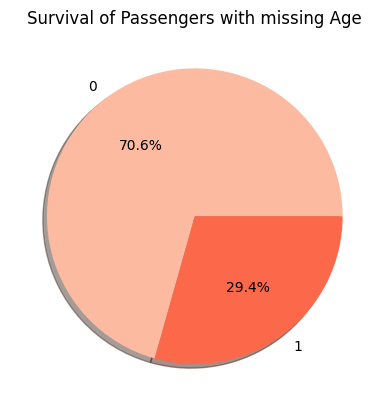

In [42]:
plt.pie(missingages['Survived'].value_counts(),labels=missingages['Survived'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Survival of Passengers with missing Age')
plt.show()

I assume that missing values here were (MNAR) missing not at random and related to unobserved data, so i will use random forest regressor (model-based imputation) to predict these ages.

In [43]:
missingages

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,Southampton
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Queenstown
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,Cherbourg
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,Southampton
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,Southampton
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,Southampton


In [44]:
data['Fare'] = data['Fare']/data['Fare'].max()

<Axes: xlabel='Fare', ylabel='Count'>

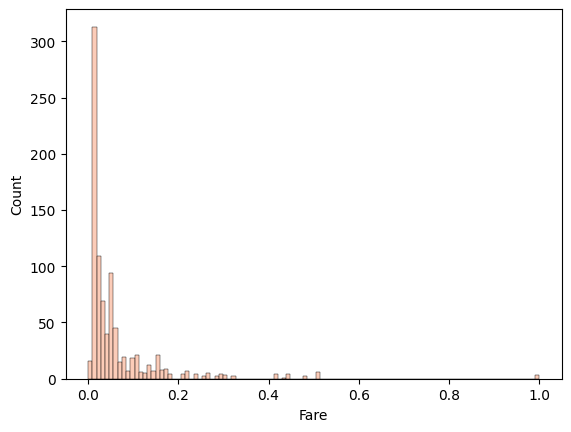

In [45]:
sns.histplot(data['Fare'])

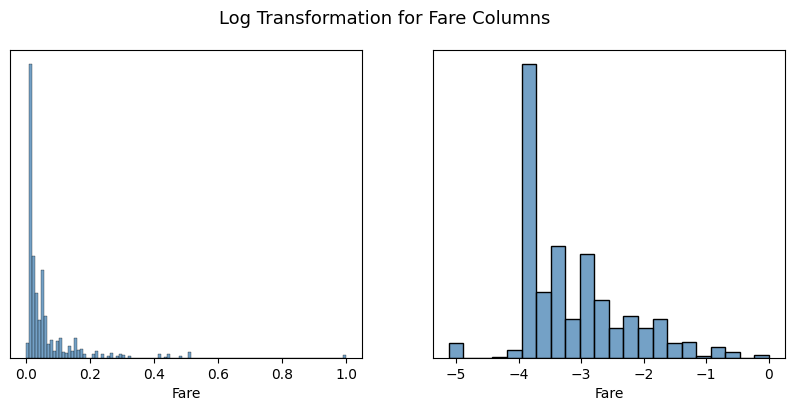

In [46]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(data=data,x='Fare',color='steelblue',ax=ax[0])
sns.histplot(x=np.log(data['Fare']+.006),color='steelblue',ax=ax[1])

fig.suptitle('Log Transformation for Fare Columns',size=13)
for i in range(2):ax[i].set_yticks([]);ax[i].set_ylabel('')
plt.show()

# Pipeline

In [47]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S


In [128]:
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [129]:
# cat_pipeline2 = Pipeline([
#     ('impute',SimpleImputer(strategy='most_frequent')),
#     ('encoder',LabelEncoder())
# ])

In [130]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda x : np.log10(x+.001), feature_names_out="one-to-one"),
    MinMaxScaler(clip=True)
)

In [131]:
upper_limit = df['Fare'].quantile(.75) + 1.5*(df['Fare'].quantile(.75)-df['Fare'].quantile(.25))
def extract_fare(df):
    return pd.DataFrame(df['Fare'].apply(lambda x: 1 if x > upper_limit else 0))
fare_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy="median")),
    ('alot_of_fare', FunctionTransformer(extract_fare, validate=False))
])

In [132]:
def cabin_letter_extract(data):
    return pd.DataFrame(data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'None'))
cabin_pipeline = Pipeline([
    ('cabin_letter',FunctionTransformer(cabin_letter_extract,validate=False)),
    ('cat_pipeline',cat_pipeline)
])

In [133]:
df['Age'].skew()

0.38910778230082704

In [134]:
def age_class_extract(df):
    return pd.DataFrame(df['Age'].apply(lambda x :  1 if x<=10 else 2 if x<=60 else 3))
age_class_pipeline = Pipeline([
    ('extract classes',FunctionTransformer(age_class_extract,validate=False))
])
age_pipeline = Pipeline([
    ('imputer',KNNImputer(n_neighbors=5)),# need to be another
#     ('imputer',SimpleImputer(strategy='median')),
    ('scaling',MinMaxScaler(clip=True))
])

## Preprocessing

In [160]:
preprocessing = ColumnTransformer([
    ('cat',cat_pipeline,['Pclass','Embarked']),
    ('cat2', OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'), ['Sex']),
    ('log',log_pipeline,['Fare']),
    ('extract fare',fare_pipeline,['Fare']),
#     ('cabin letter',cabin_pipeline,['Cabin']),
    ('extract age classes',age_class_pipeline,['Age']),
    ('age pipeline',age_pipeline,['Age']),
    ('pass','passthrough',['SibSp','Parch'])
],
remainder='drop'
)

In [161]:
preprocessing

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked']),
                                ('cat2',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['Sex']),
                                ('log',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))...
                                                  FunctionTransformer(func=<function extract_fare at 0x7e9805a64f70>))]),
                                 ['Fare']),
                                ('extract age classes',
                                 Pipeline(steps=[('extract classes',
                                                  FunctionTransformer(func=<function age_class_extract at 0x7e97cc388670>))]),
                                 ['Age']),
                                ('age pipeline',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaling',
                                                  MinMaxScaler(clip=True))]),
                                 ['Age']),
                                ('pass', 'passthrough', ['SibSp', 'Parch'])])

In [162]:
preprocessing.fit_transform(df).sample()

,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat2__Sex_male,log__Fare,extract fare__Fare,extract age classes__Age,age pipeline__Age,pass__SibSp,pass__Parch
110,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.825987,0,2,0.585323,0,0


In [169]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(score_func=f_classif,k=10)

In [170]:
final_pipeline = Pipeline([
    ('Preprocessing',preprocessing),
    ('Feature Selection',feature_selection),
])

In [171]:
final_data = final_pipeline.fit_transform(df.drop(columns=['Survived']),df['Survived'])
final_data

,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Embarked_C,cat__Embarked_S,cat2__Sex_male,log__Fare,extract fare__Fare,extract age classes__Age,pass__Parch
0,0.0,0.0,1.0,0.0,1.0,1.0,0.676130,0.0,2.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.849978,1.0,2.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.682900,0.0,2.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.827579,0.0,2.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.684091,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.720543,0.0,2.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.784149,0.0,2.0,0.0
888,0.0,0.0,1.0,0.0,1.0,0.0,0.765413,0.0,3.0,2.0
889,1.0,0.0,0.0,1.0,0.0,1.0,0.784149,0.0,2.0,0.0


In [172]:
X, y = final_data,df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=32)

In [173]:
print(X_train.shape,X_test.shape)

(712, 10) (179, 10)


In [174]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [175]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print('Train Accuracy',accuracy_score(y_train,train_predictions))
print('Test Accuracy',accuracy_score(y_test,test_predictions))

Train Accuracy 0.9410112359550562
Test Accuracy 0.8156424581005587


### Test Data

In [176]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.sample(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
377,1269,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [177]:
test_data_prepared = final_pipeline.transform(test_data)
test_data_prepared.sample(2)

,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Embarked_C,cat__Embarked_S,cat2__Sex_male,log__Fare,extract fare__Fare,extract age classes__Age,pass__Parch
389,0.0,0.0,1.0,0.0,1.0,1.0,0.757291,0.0,1.0,1.0
320,0.0,0.0,1.0,0.0,1.0,1.0,0.681447,0.0,2.0,0.0


In [178]:
# os.environ['KAGGLE_USERNAME'] = 'sayedgamal99'
# os.environ['KAGGLE_KEY'] = '2b1e89b4a18a952af57f12ea4d8d640c'

In [179]:
model.fit(X,y)

RandomForestClassifier()

In [180]:
train_predictions = model.predict(X_train)
print('Train Accuracy',accuracy_score(y_train,train_predictions))

Train Accuracy 0.9410112359550562


In [181]:
predictions = model.predict(test_data_prepared)
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

In [182]:
!kaggle competitions submit -c titanic -f submission.csv -m "1st_submission_with_rf"

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 1.49kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [183]:
!kaggle competitions submissions -c titanic | head -n 3

fileName        date                 description                                          status    publicScore  privateScore  
--------------  -------------------  ---------------------------------------------------  --------  -----------  ------------  
submission.csv  2023-12-13 16:24:59  1st_submission_with_rf                               complete  0.74401                    
